<h1><center>Assignment 3</center></h1>
<h1><center>Data Classification</center></h1>
<br><br><br><br>


## Names:
### 1. Amr Hendy (46)
### 2. Abdelrhman Yasser (37)

## Introduction to MAGIC Gamma Telescope DataSet
The data are MC generated  to simulate registration of high energy
 gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the
 imaging technique. Cherenkov gamma telescope observes high energy gamma rays,
 taking advantage of the radiation emitted by charged particles produced
 inside the electromagnetic showers initiated by the gammas, and developing in the
 atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks
 through the atmosphere and gets recorded in the detector, allowing reconstruction
 of the shower parameters. The available information consists of pulses left by
 the incoming Cherenkov photons on the photomultiplier tubes, arranged in a
 plane, the camera. Depending on the energy of the primary gamma, a total of
 few hundreds to some 10000 Cherenkov photons get collected, in patterns
 (called the shower image), allowing to discriminate statistically those
 caused by primary gammas (signal) from the images of hadronic showers
 initiated by cosmic rays in the upper atmosphere (background).

 Typically, the image of a shower after some pre-processing is an elongated
 cluster. Its long axis is oriented towards the camera center if the shower axis
 is parallel to the telescope's optical axis, i.e. if the telescope axis is
 directed towards a point source. A principal component analysis is performed
 in the camera plane, which results in a correlation axis and defines an ellipse.
 If the depositions were distributed as a bivariate Gaussian, this would be
 an equidensity ellipse. The characteristic parameters of this ellipse
 (often called Hillas parameters) are among the image parameters that can be
 used for discrimination. The energy depositions are typically asymmetric
 along the major axis, and this asymmetry can also be used in discrimination.
 There are, in addition, further discriminating characteristics, like the
 extent of the cluster in the image plane, or the total sum of depositions.

 The data set was generated by a Monte Carlo program, Corsika, described in 
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
 The program was run with parameters allowing to observe events with energies down
 to below 50 GeV.

## Exploring Dataset
We will begin by exploring MAGIC Gamma Telescope Dataset:

- Total number of Instances = 19020 
  
  we will divide them into 70% (13314 samples) as training set and 30% (5706 samples) as tetsing set.

- Classes are gamma (g) and hadron (h),

  The dataset is distributed between the two classes as following:
  - 12332 instances for gamma class
  - 6688 instances for hadron class
  
- Now we will explore the attributes of the dataset:
  1. fLength: continuous, describes the major axis of ellipse [mm] 
  2. fWidth: continuous, describes minor axis of ellipse [mm] 
  3. fSize: continuous, describes 10-log of sum of content of all pixels [in #phot] 
  4. fConc: continuous, describes ratio of sum of two highest pixels over fSize [ratio] 
  5. fConc1: continuous, describes ratio of highest pixel over fSize [ratio] 
  6. fAsym: continuous, describes distance from highest pixel to center, projected onto major axis [mm] 
  7. fM3Long: continuous, describes 3rd root of third moment along major axis [mm] 
  8. fM3Trans: continuous, describes 3rd root of third moment along minor axis [mm] 
  9. fAlpha: continuous, describes angle of major axis with vector to origin [deg] 
  10. fDist: continuous, describes distance from origin to center of ellipse [mm] 
  11. class: g and h , describes gamma (signal), hadron (background) 

## Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import matplotlib.patches as mpatches

## Loading dataset 

In [0]:
def load_dataset():
  url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data'
  attribute_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
  df = pd.read_csv(url, index_col=False, names=attribute_names)
  return df

In [4]:
dataset_df = load_dataset()
print("DataSet contains {} samples".format(dataset_df.shape[0]))
dataset_df.head()

DataSet contains 19020 samples


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Dataset Summary

In [5]:
dataset_df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


## Exploring the Balance of class labels

In [6]:
classes_cnt = dataset_df['class'].value_counts()
print(classes_cnt)

g    12332
h     6688
Name: class, dtype: int64


**Dataset is imbalanced, so we will randomly put aside the extra readings for the gamma “g” class to make both classes equal in size which balance the dataset.**

### Dataset Balancing

In [7]:
random_state = 42
random_samples = dataset_df[dataset_df['class'] == 'g'].sample(n=classes_cnt[0]-classes_cnt[1], random_state=random_state)
display(random_samples)
balanced_df = dataset_df.drop(random_samples.index);

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
8917,41.8269,26.3680,3.0422,0.2350,0.1202,24.1335,40.1360,20.4737,29.3920,173.6130,g
772,59.0164,18.0200,3.3073,0.2587,0.1422,57.7010,59.9175,15.4044,1.3107,237.6220,g
12252,15.0205,12.1918,2.3560,0.6608,0.3370,1.9014,-2.0715,3.6258,89.2740,105.2140,g
7793,51.4720,10.4108,2.5453,0.3276,0.1838,73.5451,17.7028,-7.1886,16.7782,176.5590,g
6601,25.3814,15.7361,2.6186,0.4188,0.2419,27.8332,17.8775,5.4552,10.1725,80.3929,g
247,50.0122,17.8938,3.0388,0.2570,0.1331,42.9603,19.7787,-11.2019,2.8523,201.7660,g
4610,32.5717,18.4936,2.8707,0.3219,0.1623,-16.7857,-10.8447,11.6068,20.1510,193.3050,g
218,46.5588,28.6929,3.3971,0.1864,0.0996,17.6816,46.0987,10.2050,12.7270,107.7470,g
4023,38.6668,20.1272,2.9727,0.2737,0.1550,17.8267,29.1279,-12.2051,6.4438,242.5140,g
4246,42.0190,7.3876,2.3444,0.5882,0.3054,51.0773,-14.9667,-3.4860,13.4966,184.7730,g


In [8]:
balanced_df['class'].value_counts()

g    6688
h    6688
Name: class, dtype: int64

###Separating Features from Class Label

In [0]:
X = balanced_df.drop('class', axis=1)
Y = balanced_df['class']

### Dataset Visualization

**1) Using BoxPlots**

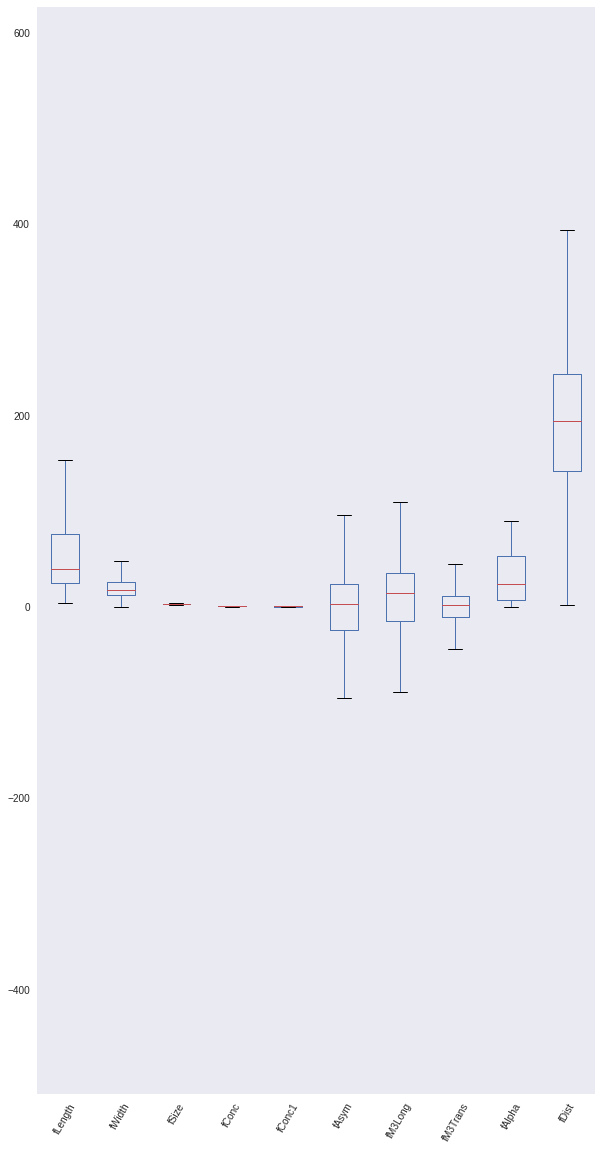

In [10]:
X.iloc[:,:].boxplot(grid=False, fontsize=10, rot=60, figsize=(10,20))

In [0]:
def plot_data(x_data, y_data, x_title, y_title, title, xticks):
  fig = plt.figure(figsize=(15,8))
  plt.plot(x_data, y_data, 'bo')
  fig.suptitle(title, fontsize=16)
  plt.xlabel(x_title)
  plt.ylabel(y_title)
  plt.xticks(xticks)
  plt.show()
  return

def plot_pretty_data(X, Y):
  classes_values = Y.unique()
  feature_names = list(X.columns)
  all_x = []
  all_y = []
  # plotting each class alone
  for class_val in classes_values:
    # making feature points
    x = []
    y = []
    for i in range(0, len(feature_names)):
      feature_values = list(X.loc[Y[Y == class_val].index].iloc[:, i])
      y = y + feature_values
      x = x + [i] * len(feature_values)
    all_x = all_x + x
    all_y = all_y + y
  # plotting all classes together
  plot_data(all_x, all_y, 'Feature Number', 'Feature Value', 'All Classes', [i for i in range(0, len(feature_names))])

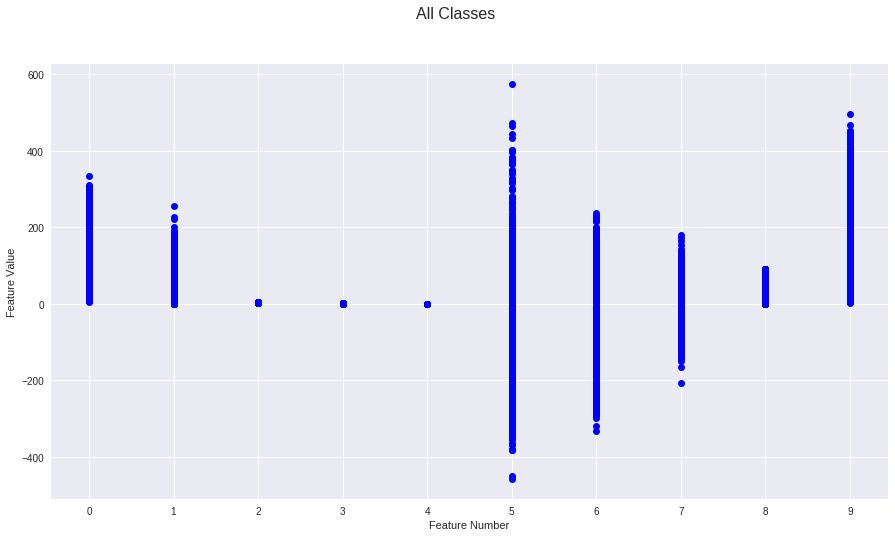

In [12]:
plot_pretty_data(X, Y)

We can see from the previous figures, features have different ranges so that may cause problems with some classifiers that depends on the distance between the samples. We wil discuss the scaling and normalization in the preprocessing part later.

**2) Using Histograms**

In [0]:
def plot_histogram(X, Y, bins=15, rwidth=0.5):
  colors = ['red', 'green', 'blue', 'olive', 'yellow', 'gray', 'black', 'gold', 'skyblue', 'teal']
  classes = Y.unique()
  for class_val in classes:
    data = X.loc[Y[Y == class_val].index]
    plt.figure(figsize=(20,10))
    plt.title("Class " + class_val )
    plt.xlabel("Feature Value")
    plt.ylabel("Value Frequency")
    plt.hist(np.array(data), bins=bins, color=np.array(colors), label=classes, rwidth=rwidth)
    plt.legend()
    plt.show()

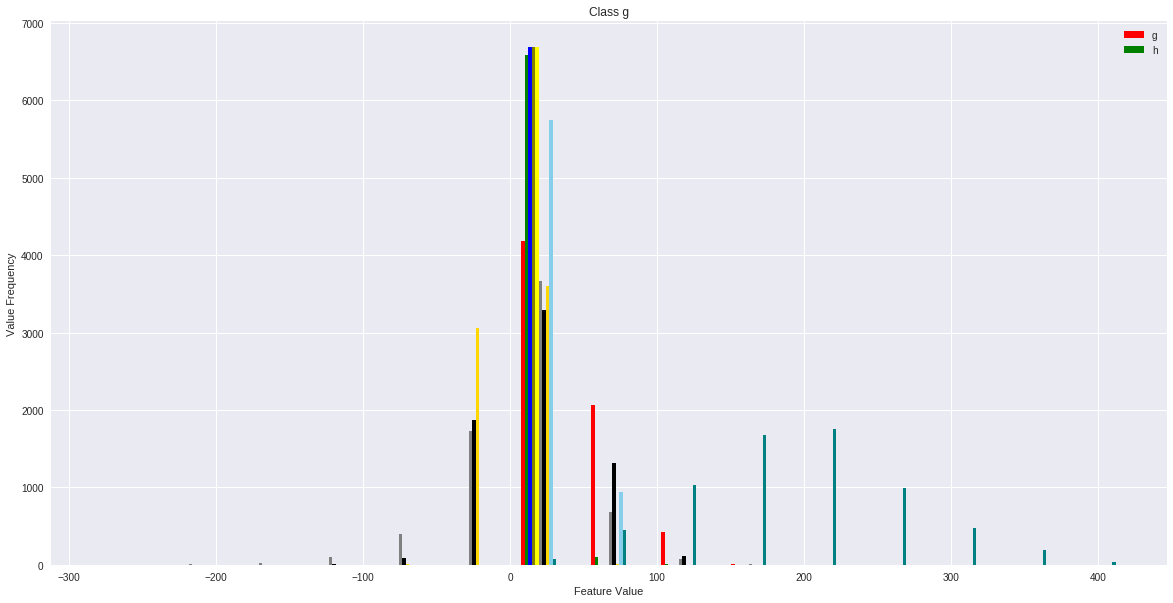

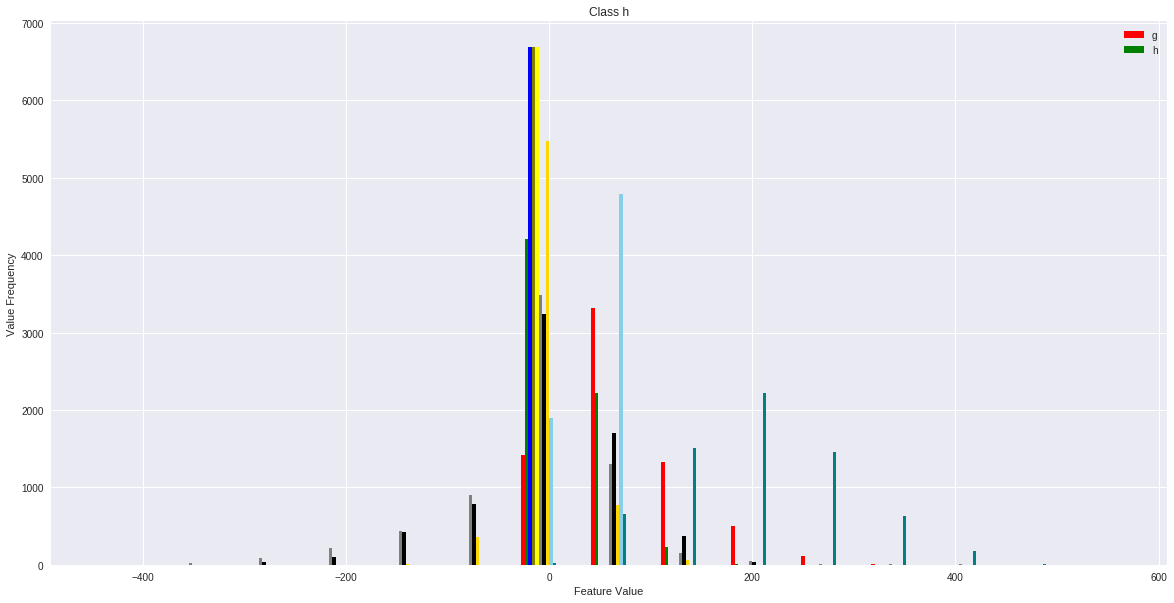

In [14]:
plot_histogram(X, Y)

**3) Using Correlation Matrix**

In [0]:
def visualize_coeff_matrix(mat):
  fig = plt.figure(figsize = (12,12))
  plt.imshow(mat, cmap='Reds')
  plt.colorbar()
  plt.xticks([i for i in range(0,mat.shape[0])])
  plt.yticks([i for i in range(0,mat.shape[0])])

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1.000000,0.776814,0.709716,-0.637187,-0.603142,-0.393110,-0.199402,0.010204,0.033748,0.388169
fWidth,0.776814,1.000000,0.730120,-0.617294,-0.587335,-0.287842,-0.230654,0.035011,0.088829,0.340100
fSize,0.709716,0.730120,1.000000,-0.847264,-0.804703,-0.204175,-0.005990,0.009724,-0.122976,0.425745
fConc,-0.637187,-0.617294,-0.847264,1.000000,0.975703,0.147380,-0.046025,-0.007396,0.168129,-0.312163
fConc1,-0.603142,-0.587335,-0.804703,0.975703,1.000000,0.133222,-0.046321,-0.007627,0.165799,-0.288669
fAsym,-0.393110,-0.287842,-0.204175,0.147380,0.133222,1.000000,0.286077,0.003879,-0.049057,-0.214274
fM3Long,-0.199402,-0.230654,-0.005990,-0.046025,-0.046321,0.286077,1.000000,-0.019710,-0.150345,-0.022280
fM3Trans,0.010204,0.035011,0.009724,-0.007396,-0.007627,0.003879,-0.019710,1.000000,0.004834,0.009650
fAlpha,0.033748,0.088829,-0.122976,0.168129,0.165799,-0.049057,-0.150345,0.004834,1.000000,-0.173700
fDist,0.388169,0.340100,0.425745,-0.312163,-0.288669,-0.214274,-0.022280,0.009650,-0.173700,1.000000


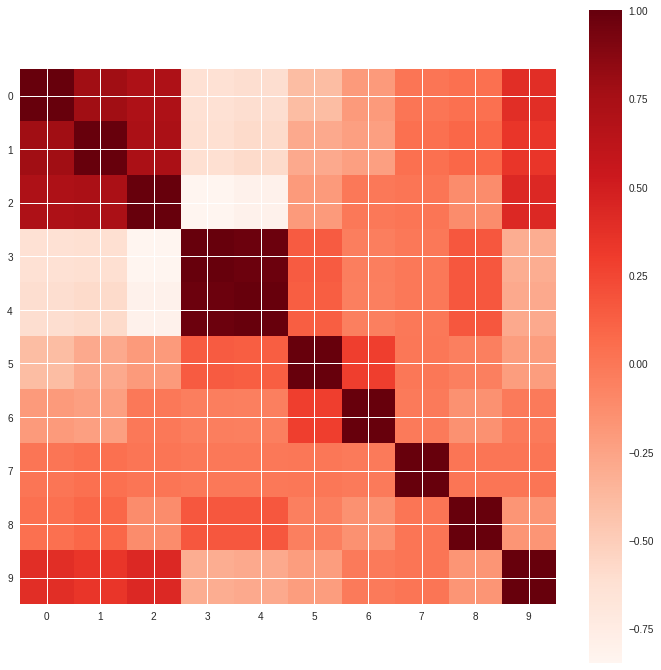

In [16]:
display(X.corr())
visualize_coeff_matrix(X.corr())

From the correlation Matrix we can see that the first 3 features (0,1,2) are highly dependant/correlated, also the features (3,4) are highly correlated. That will give us hints to use some methods of dimensionality reduction. we will discuss that part also in the preprocessing part.

### Class Encoder
we need to convert the class labels into numerical labels to be used later in the classification algroithms.  We will use SciKit learn labelencoder class to help us perform this step.

In [17]:
from sklearn.preprocessing import LabelEncoder
class_encoder = LabelEncoder()
Y = class_encoder.fit_transform(Y)
print(Y)

[0 0 0 ... 1 1 1]


## Dataset Split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state, shuffle=True)

In [19]:
print('Training set has {} samples'.format(len(X_train)))
print('Testing set has {} samples'.format(len(X_test)))

Training set has 9363 samples
Testing set has 4013 samples


## Preprocessing

### 1) Feature Projection Using PCA

We already have seen from the correlation matrix, there are some highly correlated features. So we will try to reduce the dimensionality as we can with no loss in the covered variance of the data.

In [0]:
from sklearn.decomposition import PCA
def plot_pca(X):
  features_number = X.shape[1]
  pca = PCA(n_components=features_number, random_state=random_state)
  pca.fit(X)
  plt.figure(figsize=(20,8))
  plt.title('PCA Components variance ratio')
  plt.xlabel('PCA Component')
  plt.ylabel('Variance Ratio')
  plt.xticks([i for i in range(1, features_number + 1)])
  plt.plot([i for i in range(1, features_number + 1)], pca.explained_variance_ratio_, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
  plt.show()
  
  plt.figure(figsize=(20,8))
  plt.title('Relation Between Number of PCA Components taken and Covered Variance Ratio')
  plt.xlabel('Number of Taken PCA Components')
  plt.ylabel('Covered Variance Ratio')
  plt.xticks([i for i in range(1, features_number + 1)])
  plt.plot([i for i in range(1, features_number + 1)], pca.explained_variance_ratio_.cumsum(), color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
  plt.show()

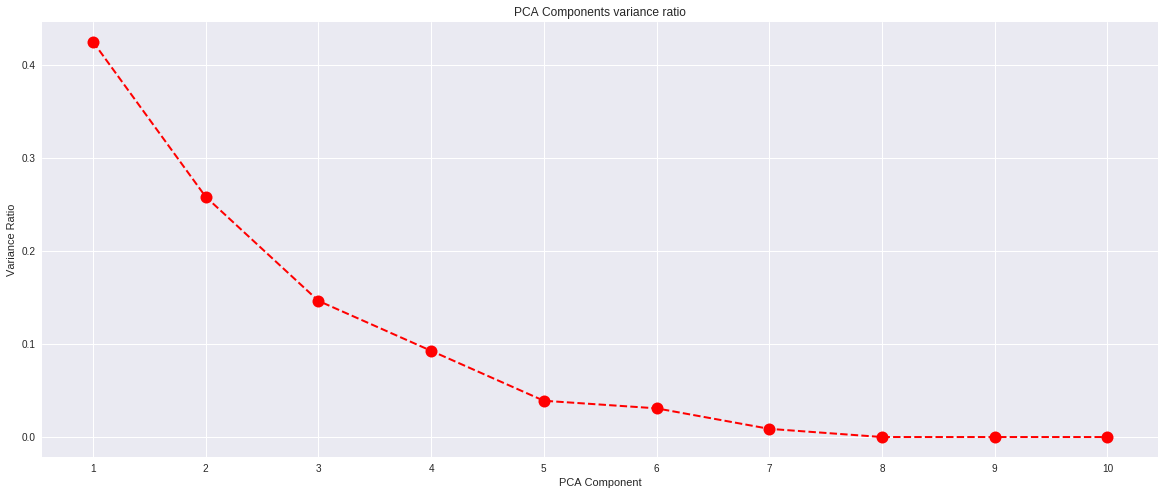

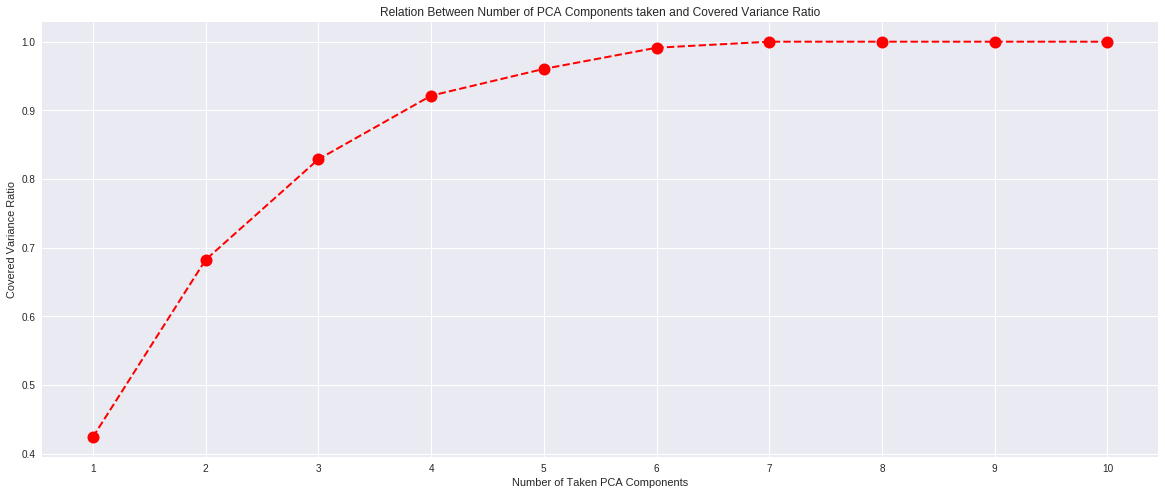

In [21]:
plot_pca(X_train)

**We will choose to reduce the dimensionality to 7 dimensions which guarantees covering all the variance in the original data.**

In [22]:
pca = PCA(7, random_state=random_state)
pca.fit(X_train)
X_train_reduced = pd.DataFrame(pca.transform(X_train))
print("Training set after applying PCA Dimensionality Reduction")
display(X_train_reduced)

Training set after applying PCA Dimensionality Reduction


,0,1,2,3,4,5,6
0,-16.546842,-24.277799,5.007968,-27.981980,-13.831005,2.539096,-4.822284
1,-121.129325,70.790673,-28.223067,-2.639139,-22.289692,8.785993,2.796413
2,-67.221095,49.489266,-4.531626,-27.239699,4.876373,10.709768,3.450871
3,-11.839431,-37.962612,10.611621,-23.288110,-20.776383,10.371709,1.152605
4,-84.615819,48.985215,5.118009,-5.484081,26.635890,14.563601,1.464058
5,38.516260,10.397814,-48.915315,-27.944909,-3.774332,1.098410,-5.665947
6,-63.169287,-1.967153,-0.842829,-14.824305,-3.086233,11.345546,0.698118
7,6.468532,-59.528511,-1.309795,-21.646254,26.201472,12.776378,-4.492935
8,-2.864002,-58.463905,5.936755,-2.534028,-22.540524,-4.645410,-1.069631
9,-62.770342,6.058112,12.880204,4.580651,53.309551,-8.791325,-5.312912


In [23]:
pca = PCA(7, random_state=random_state)
pca.fit(X_test)
X_test_reduced = pd.DataFrame(pca.transform(X_test))
print("Testing set after applying PCA Dimensionality Reduction")
display(X_test_reduced)

Testing set after applying PCA Dimensionality Reduction


,0,1,2,3,4,5,6
0,-18.329776,16.501616,9.897635,-39.892924,15.422429,-0.788165,2.851253
1,-2.860954,-1.917680,18.771580,-40.723332,33.418728,-16.769306,3.895413
2,164.321191,28.408608,122.221065,-6.424774,-22.504089,-35.853990,-16.826152
3,152.065253,-72.366003,-68.223270,-10.940495,-13.792609,-15.604002,2.450138
4,70.482350,-65.095651,-55.460918,0.051589,6.671656,21.482214,7.561531
5,-33.345531,-45.625077,-43.862167,31.454528,-24.276620,24.731841,0.148595
6,5.629143,-20.912936,6.011723,-45.385764,21.491045,-5.235493,2.017541
7,65.187055,11.927034,-84.142309,-20.417000,-24.165058,-18.772577,4.634154
8,-64.685438,54.171078,-35.483793,-3.929689,49.957705,4.237597,-4.294311
9,112.567330,-107.207058,-15.831605,7.412472,31.804578,14.848433,-13.139716


### 2) Z Score Normalization

We have seen from the histograms that the data is distributed to nearly normal for some features. So we will try to normalize all the featues to be more useful later in the classification algorithms.

In [24]:
from scipy.stats import zscore
X_train_reduced_normalized = X_train_reduced.apply(zscore)
display(X_train_reduced_normalized)

,0,1,2,3,4,5,6
0,-0.193417,-0.364022,0.099734,-0.700387,-0.533660,0.110161,-0.391798
1,-1.415885,1.061439,-0.562065,-0.066058,-0.860033,0.381189,0.227201
2,-0.785750,0.742044,-0.090248,-0.681808,0.188152,0.464654,0.280374
3,-0.138392,-0.569213,0.211332,-0.582900,-0.801643,0.449987,0.093646
4,-0.989077,0.734487,0.101926,-0.137266,1.027728,0.631856,0.118951
5,0.450218,0.155905,-0.974154,-0.699459,-0.145630,0.047656,-0.460343
6,-0.738388,-0.029496,-0.016785,-0.371052,-0.119080,0.492238,0.056720
7,0.075611,-0.892573,-0.026085,-0.541805,1.010966,0.554316,-0.365039
8,-0.033477,-0.876610,0.118231,-0.063427,-0.869711,-0.201546,-0.086905
9,-0.733725,0.090836,0.256511,0.114653,2.056914,-0.381420,-0.431660


In [25]:
X_test_reduced_normalized = X_test_reduced.apply(zscore)
display(X_test_reduced_normalized)

,0,1,2,3,4,5,6
0,-0.213218,0.249309,0.203893,-0.987024,0.592913,-0.033353,0.241407
1,-0.033280,-0.028973,0.386698,-1.007570,1.284777,-0.709641,0.329813
2,1.911435,0.429202,2.517774,-0.158961,-0.865166,-1.517264,-1.424622
3,1.768870,-1.093317,-1.405410,-0.270688,-0.530254,-0.660328,0.207446
4,0.819873,-0.983475,-1.142504,0.001276,0.256491,0.909081,0.640213
5,-0.387886,-0.689311,-0.903568,0.778243,-0.933310,1.046599,0.012581
6,0.065480,-0.315956,0.123842,-1.122927,0.826219,-0.221555,0.170819
7,0.758276,0.180196,-1.733345,-0.505154,-0.929021,-0.794415,0.392361
8,-0.752441,0.818425,-0.730972,-0.097228,1.920615,0.179326,-0.363587
9,1.309418,-1.619701,-0.326134,0.183398,1.222721,0.628354,-1.112502


### 3) Min Max Scaler

We have seen also from the boxplot that many features have different ranges, so trying to scaling all the features to the same range such as [0,1] is often useful especially in the algorithms where distance between the sample points is highly considered such as KNN, and SVM.

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=scaler.fit_transform(X_test), columns=X_test.columns)

## Classification

We will use several classifiers for our classification problem and evaluate them.

This function will be used to get the result of any classifier easily.

In [0]:
from sklearn.metrics import accuracy_score, fbeta_score
def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time() # Get start time
    learner.fit(X_train, y_train)
    end = time() # Get end time
    results['train_time'] = end - start
        
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    results['pred_time'] = end - start
      
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
      
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
      
    print("{} trained on {} samples, and tests predicted with accuracy {} and fscore {}".format(learner.__class__.__name__, len(X_train), results['acc_test'], results['f_test']))
   
    # Return the results
    return results

This function will be used to compare between the different classifiers results.

In [0]:
def evaluate(results, title):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (15,10))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00AFFD','#00AB0A','#C0A0AA', '#ADA000']
    
    # classifier
    for k, learner in enumerate(results.keys()):
        # metric
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
              # Creative plot code
              ax[int(j/3), j%3].bar(k*bar_width, results[learner][metric], width=bar_width, color=colors[k])
              ax[int(j/3), j%3].set_xticks([0.45, 1.45, 2.45])
              ax[int(j/3), j%3].set_xlabel("Classiifer Algorithm")
              ax[int(j/3), j%3].set_xlim((-0.1, 3.0))

    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor=(-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle(title, fontsize = 16, y = 1.02)
    plt.tight_layout()
    plt.show()
    

Here are our results which will be compared by plotting.

In [0]:
results = {}
results_reduced = {}
results_reduced_normalized = {}

### 1) Using Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=random_state)
print('Before Preprocessing')
results[clf.__class__.__name__] = train_predict(clf, X_train, y_train, X_test, y_test)
print('After Applying PCA')
results_reduced[clf.__class__.__name__] = train_predict(clf, X_train_reduced, y_train, X_test_reduced, y_test)
print('After Applying PCA and Z Normalization')
results_reduced_normalized[clf.__class__.__name__] = train_predict(clf, X_train_reduced_normalized, y_train, X_test_reduced_normalized, y_test)
print('After Scaling Using MinMaxScaler')
train_predict(clf, X_train_scaled, y_train, X_test_scaled, y_test);

Before Preprocessing
DecisionTreeClassifier trained on 9363 samples, and tests predicted with accuracy 0.7881883877398455 and fscore 0.7868455563401594
After Applying PCA
DecisionTreeClassifier trained on 9363 samples, and tests predicted with accuracy 0.7353600797408423 and fscore 0.7322551662174304
After Applying PCA and Z Normalization
DecisionTreeClassifier trained on 9363 samples, and tests predicted with accuracy 0.7331173685522053 and fscore 0.7296329453894359
After Scaling Using MinMaxScaler
DecisionTreeClassifier trained on 9363 samples, and tests predicted with accuracy 0.7201594816845253 and fscore 0.7088296808220425


### 2) Using Naïve Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
print('Before Preprocessing')
results[clf.__class__.__name__] = train_predict(clf, X_train, y_train, X_test, y_test)
print('After Applying PCA')
results_reduced[clf.__class__.__name__] = train_predict(clf, X_train_reduced, y_train, X_test_reduced, y_test)
print('After Applying PCA and Z Normalization')
results_reduced_normalized[clf.__class__.__name__] = train_predict(clf, X_train_reduced_normalized, y_train, X_test_reduced_normalized, y_test)
print('After Scaling Using MinMaxScaler')
train_predict(clf, X_train_scaled, y_train, X_test_scaled, y_test);

Before Preprocessing
GaussianNB trained on 9363 samples, and tests predicted with accuracy 0.6568651881385497 and fscore 0.6711733462095607
After Applying PCA
GaussianNB trained on 9363 samples, and tests predicted with accuracy 0.6929977572888114 and fscore 0.7162941093771966
After Applying PCA and Z Normalization
GaussianNB trained on 9363 samples, and tests predicted with accuracy 0.6927485671567406 and fscore 0.7153835405896325
After Scaling Using MinMaxScaler
GaussianNB trained on 9363 samples, and tests predicted with accuracy 0.6411662098180912 and fscore 0.6408995944451271


### 3) Support Vector Machines (SVM)

In [32]:
from sklearn.svm import SVC
clf = SVC(random_state=random_state)
print('Before Preprocessing')
results[clf.__class__.__name__] = train_predict(clf, X_train, y_train, X_test, y_test)
print('After Applying PCA')
results_reduced[clf.__class__.__name__] = train_predict(clf, X_train_reduced, y_train, X_test_reduced, y_test)
print('After Applying PCA and Z Normalization')
results_reduced_normalized[clf.__class__.__name__] = train_predict(clf, X_train_reduced_normalized, y_train, X_test_reduced_normalized, y_test)
print('After Scaling Using MinMaxScaler')
train_predict(clf, X_train_scaled, y_train, X_test_scaled, y_test);

Before Preprocessing
SVC trained on 9363 samples, and tests predicted with accuracy 0.5664091701968602 and fscore 0.5869551891129774
After Applying PCA
SVC trained on 9363 samples, and tests predicted with accuracy 0.5046100174433092 and fscore 0.035629453681710214
After Applying PCA and Z Normalization
SVC trained on 9363 samples, and tests predicted with accuracy 0.7951657114378271 and fscore 0.8072945019052803
After Scaling Using MinMaxScaler
SVC trained on 9363 samples, and tests predicted with accuracy 0.7762272614004485 and fscore 0.7807744779095392


### 4) K-Nearest Neighbor (K-NN)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
print('Before Preprocessing')
results[clf.__class__.__name__] = train_predict(clf, X_train, y_train, X_test, y_test)
print('After Applying PCA')
results_reduced[clf.__class__.__name__] = train_predict(clf, X_train_reduced, y_train, X_test_reduced, y_test)
print('After Applying PCA and Z Normalization')
results_reduced_normalized[clf.__class__.__name__] = train_predict(clf, X_train_reduced_normalized, y_train, X_test_reduced_normalized, y_test)
print('After Scaling Using MinMaxScaler')
train_predict(clf, X_train_scaled, y_train, X_test_scaled, y_test);

Before Preprocessing
KNeighborsClassifier trained on 9363 samples, and tests predicted with accuracy 0.7535509593820084 and fscore 0.7616614113297815
After Applying PCA
KNeighborsClassifier trained on 9363 samples, and tests predicted with accuracy 0.7478195863443807 and fscore 0.7543405586110213
After Applying PCA and Z Normalization
KNeighborsClassifier trained on 9363 samples, and tests predicted with accuracy 0.7597807126837777 and fscore 0.7669140582983759
After Scaling Using MinMaxScaler
KNeighborsClassifier trained on 9363 samples, and tests predicted with accuracy 0.7864440568153501 and fscore 0.7927280414332523


### 5) Random Forests

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=random_state)
print('Before Preprocessing')
results[clf.__class__.__name__] = train_predict(clf, X_train, y_train, X_test, y_test)
print('After Applying PCA')
results_reduced[clf.__class__.__name__] = train_predict(clf, X_train_reduced, y_train, X_test_reduced, y_test)
print('After Applying PCA and Z Normalization')
results_reduced_normalized[clf.__class__.__name__] = train_predict(clf, X_train_reduced_normalized, y_train, X_test_reduced_normalized, y_test)
print('After Scaling Using MinMaxScaler')
train_predict(clf, X_train_scaled, y_train, X_test_scaled, y_test);

Before Preprocessing
RandomForestClassifier trained on 9363 samples, and tests predicted with accuracy 0.7662596561176177 and fscore 0.7545139863410983
After Applying PCA
RandomForestClassifier trained on 9363 samples, and tests predicted with accuracy 0.7538001495140793 and fscore 0.7429963459196102
After Applying PCA and Z Normalization
RandomForestClassifier trained on 9363 samples, and tests predicted with accuracy 0.7547969100423623 and fscore 0.743666448536973
After Scaling Using MinMaxScaler
RandomForestClassifier trained on 9363 samples, and tests predicted with accuracy 0.7562920508347869 and fscore 0.7422623938646946


### 6) AdaBoost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=100, learning_rate=0.2, random_state=6)
print('Before Preprocessing')
results[clf.__class__.__name__] = train_predict(clf, X_train, y_train, X_test, y_test)
print('After Applying PCA')
results_reduced[clf.__class__.__name__] = train_predict(clf, X_train_reduced, y_train, X_test_reduced, y_test)
print('After Applying PCA and Z Normalization')
results_reduced_normalized[clf.__class__.__name__] = train_predict(clf, X_train_reduced_normalized, y_train, X_test_reduced_normalized, y_test)
print('After Scaling Using MinMaxScaler')
train_predict(clf, X_train_scaled, y_train, X_test_scaled, y_test);

Before Preprocessing
AdaBoostClassifier trained on 9363 samples, and tests predicted with accuracy 0.8547221530027411 and fscore 0.8661500902239675
After Applying PCA
AdaBoostClassifier trained on 9363 samples, and tests predicted with accuracy 0.7881883877398455 and fscore 0.7928040999895408
After Applying PCA and Z Normalization
AdaBoostClassifier trained on 9363 samples, and tests predicted with accuracy 0.791926239720907 and fscore 0.7959396147839668
After Scaling Using MinMaxScaler
AdaBoostClassifier trained on 9363 samples, and tests predicted with accuracy 0.7782207824570146 and fscore 0.7569511446364354


### Comparing Performance

**Let's compare between the classifiers performance on the original data before preprocessing.**

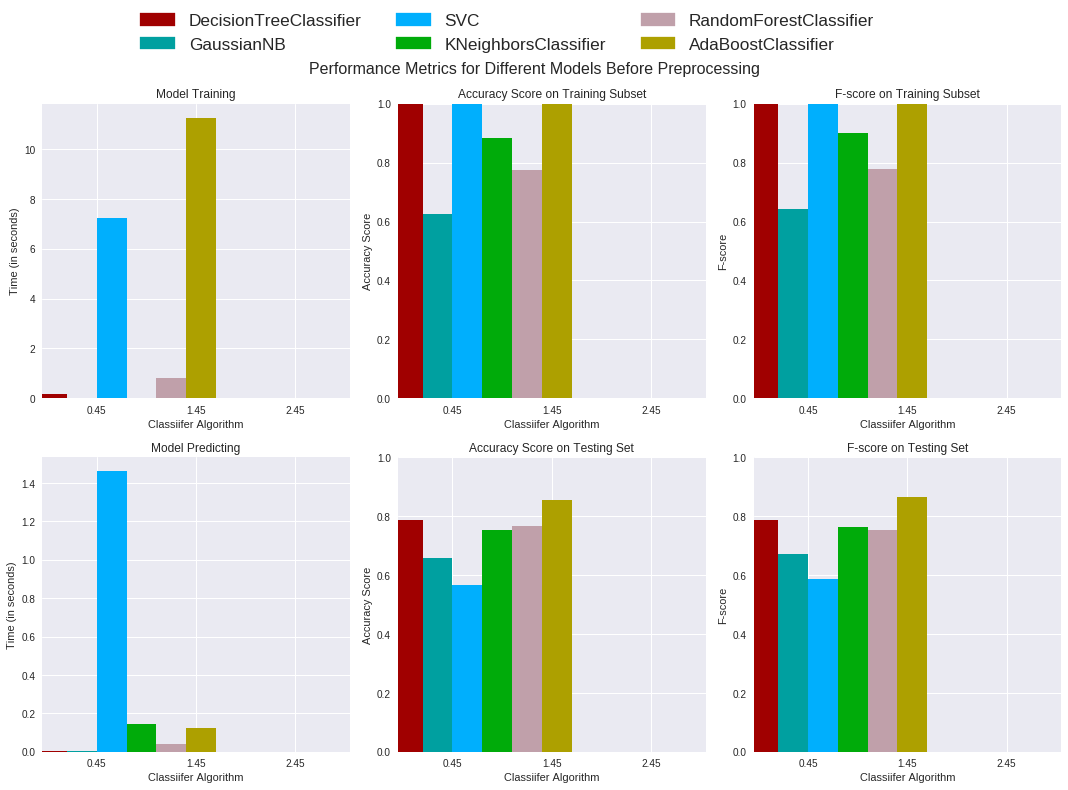

In [36]:
evaluate(results, "Performance Metrics for Different Models Before Preprocessing")

**Let's compare between the classifiers performance on the original data after applying PCA**

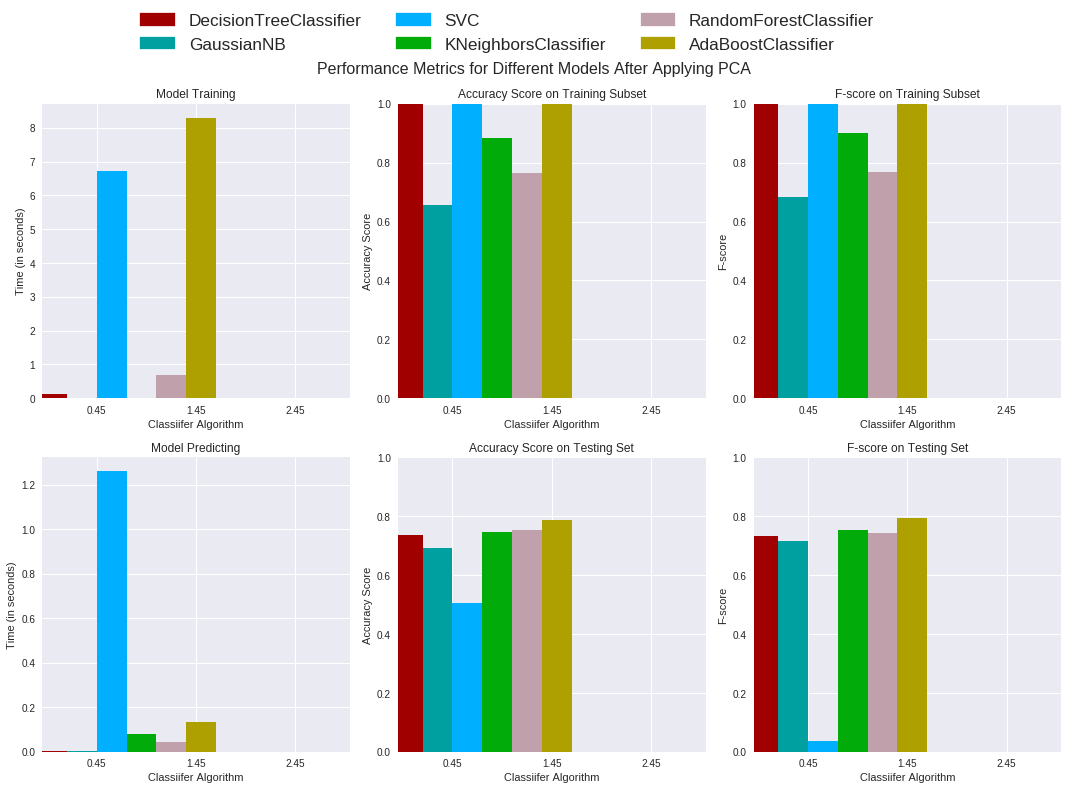

In [37]:
evaluate(results_reduced, "Performance Metrics for Different Models After Applying PCA")

**Let's compare between the classifiers performance on the original data after applying PCA and Z Normalization.**

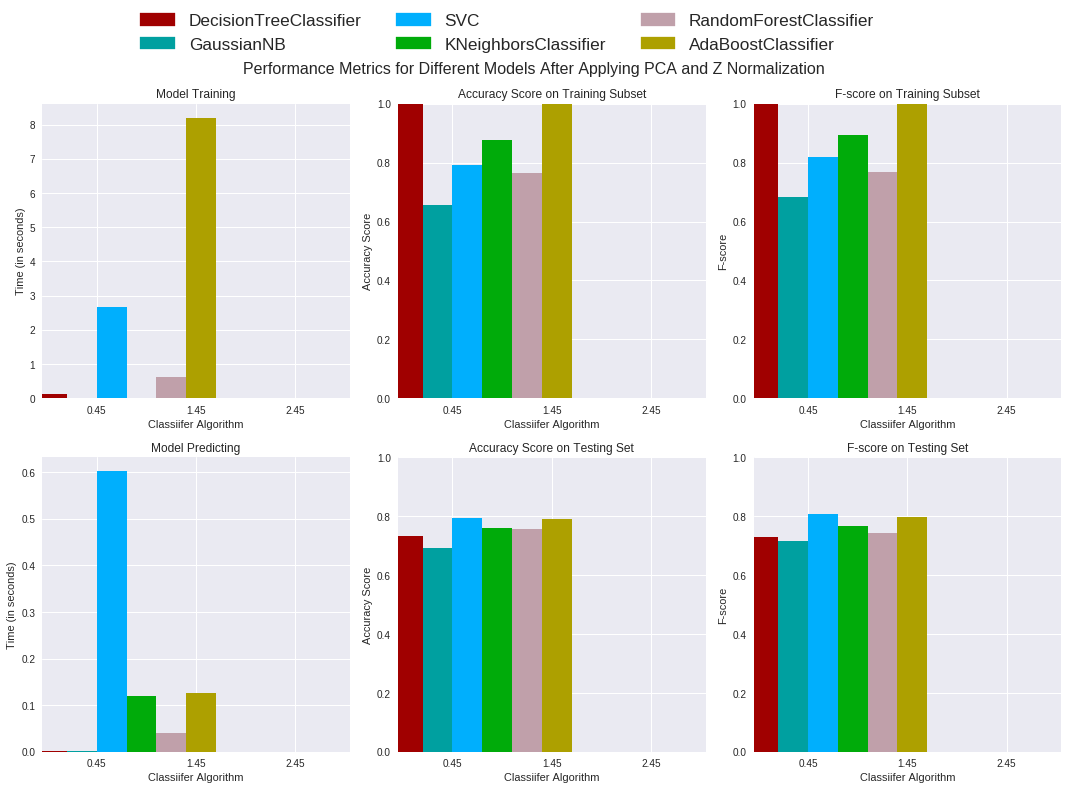

In [38]:
evaluate(results_reduced_normalized, "Performance Metrics for Different Models After Applying PCA and Z Normalization")

### More Classifiers


**Let's try more classifiers to test if we can gain more score on this dataset**

### 7) Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=6)
print('Before Preprocessing')
train_predict(clf, X_train, y_train, X_test, y_test);
print('After Applying PCA')
train_predict(clf, X_train_reduced, y_train, X_test_reduced, y_test);
print('After Applying PCA and Z Normalization')
train_predict(clf, X_train_reduced_normalized, y_train, X_test_reduced_normalized, y_test);
print('After Scaling Using MinMaxScaler')
train_predict(clf, X_train_scaled, y_train, X_test_scaled, y_test);

Before Preprocessing
GradientBoostingClassifier trained on 9363 samples, and tests predicted with accuracy 0.8457513082481933 and fscore 0.8527293601920469
After Applying PCA
GradientBoostingClassifier trained on 9363 samples, and tests predicted with accuracy 0.7889359581360578 and fscore 0.790201906323665
After Applying PCA and Z Normalization
GradientBoostingClassifier trained on 9363 samples, and tests predicted with accuracy 0.7894343384001994 and fscore 0.7899031106578277
After Scaling Using MinMaxScaler
GradientBoostingClassifier trained on 9363 samples, and tests predicted with accuracy 0.8076252180413656 and fscore 0.7993411491134579


### 8) XGBoost

In [40]:
from xgboost import XGBClassifier
from sklearn.metrics import fbeta_score
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]
fscore = fbeta_score(y_test, predictions, beta=1)
print("Fscore: %.5f" % (fscore))

Fscore: 0.83636


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 9) Neural Network

In [41]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50,50,50), solver='adam', max_iter=300, shuffle=True, batch_size=50, random_state=29, learning_rate='adaptive',alpha=0.05, activation='relu')
print('Before Preprocessing')
train_predict(clf, X_train, y_train, X_test, y_test);
print('After Applying PCA')
train_predict(clf, X_train_reduced, y_train, X_test_reduced, y_test);
print('After Applying PCA and Z Normalization')
train_predict(clf, X_train_reduced_normalized, y_train, X_test_reduced_normalized, y_test);
print('After Scaling Using MinMaxScaler')
train_predict(clf, X_train_scaled, y_train, X_test_scaled, y_test);

Before Preprocessing
MLPClassifier trained on 9363 samples, and tests predicted with accuracy 0.7846997258908547 and fscore 0.7865746937094615
After Applying PCA
MLPClassifier trained on 9363 samples, and tests predicted with accuracy 0.7849489160229255 and fscore 0.7968083943600393
After Applying PCA and Z Normalization
MLPClassifier trained on 9363 samples, and tests predicted with accuracy 0.8041365561923748 and fscore 0.8110958759624514
After Scaling Using MinMaxScaler
MLPClassifier trained on 9363 samples, and tests predicted with accuracy 0.8325442312484426 and fscore 0.8694096601073346


### 10) Quadratic Discriminant Analysis

In [42]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
print('Before Preprocessing')
train_predict(clf, X_train, y_train, X_test, y_test);
print('After Applying PCA')
train_predict(clf, X_train_reduced, y_train, X_test_reduced, y_test);
print('After Applying PCA and Z Normalization')
train_predict(clf, X_train_reduced_normalized, y_train, X_test_reduced_normalized, y_test);
print('After Scaling Using MinMaxScaler')
train_predict(clf, X_train_scaled, y_train, X_test_scaled, y_test);

Before Preprocessing
QuadraticDiscriminantAnalysis trained on 9363 samples, and tests predicted with accuracy 0.7261400448542238 and fscore 0.7672801043327054
After Applying PCA
QuadraticDiscriminantAnalysis trained on 9363 samples, and tests predicted with accuracy 0.7024669823075006 and fscore 0.7385930108347321
After Applying PCA and Z Normalization
QuadraticDiscriminantAnalysis trained on 9363 samples, and tests predicted with accuracy 0.7039621230999252 and fscore 0.7404591759160711
After Scaling Using MinMaxScaler
QuadraticDiscriminantAnalysis trained on 9363 samples, and tests predicted with accuracy 0.6984799401943683 and fscore 0.707896904789926


### 11)  Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=random_state, n_jobs=-1)
print('Before Preprocessing')
train_predict(clf, X_train, y_train, X_test, y_test);
print('After Applying PCA')
train_predict(clf, X_train_reduced, y_train, X_test_reduced, y_test);
print('After Applying PCA and Z Normalization')
train_predict(clf, X_train_reduced_normalized, y_train, X_test_reduced_normalized, y_test);
print('After Scaling Using MinMaxScaler')
train_predict(clf, X_train_scaled, y_train, X_test_scaled, y_test);

Before Preprocessing
LogisticRegression trained on 9363 samples, and tests predicted with accuracy 0.7615250436082731 and fscore 0.7665431445209105
After Applying PCA


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression trained on 9363 samples, and tests predicted with accuracy 0.7665088462496885 and fscore 0.7761909953123296
After Applying PCA and Z Normalization
LogisticRegression trained on 9363 samples, and tests predicted with accuracy 0.7665088462496885 and fscore 0.7760592528047053
After Scaling Using MinMaxScaler
LogisticRegression trained on 9363 samples, and tests predicted with accuracy 0.7610266633441316 and fscore 0.7627469231564794


### 12) Bagging Ensemble

Bagging on Neural Network

In [44]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(MLPClassifier(hidden_layer_sizes=(50,50,50), solver='adam', max_iter=300, shuffle=True, batch_size=50, random_state=29, learning_rate='adaptive',alpha=0.05, activation='relu')
                          , max_samples=0.9, max_features=0.8)
print('Before Preprocessing')
train_predict(clf, X_train, y_train, X_test, y_test);
print('After Applying PCA')
train_predict(clf, X_train_reduced, y_train, X_test_reduced, y_test);
print('After Applying PCA and Z Normalization')
train_predict(clf, X_train_reduced_normalized, y_train, X_test_reduced_normalized, y_test);
print('After Scaling Using MinMaxScaler')
train_predict(clf, X_train_scaled, y_train, X_test_scaled, y_test);

Before Preprocessing
BaggingClassifier trained on 9363 samples, and tests predicted with accuracy 0.802890605532021 and fscore 0.8029456576942609
After Applying PCA
BaggingClassifier trained on 9363 samples, and tests predicted with accuracy 0.7914278594567655 and fscore 0.8020551649540292
After Applying PCA and Z Normalization
BaggingClassifier trained on 9363 samples, and tests predicted with accuracy 0.7956640917019686 and fscore 0.7976153767088086
After Scaling Using MinMaxScaler
BaggingClassifier trained on 9363 samples, and tests predicted with accuracy 0.8218290555693994 and fscore 0.8217651231127775


### 13) Extra Trees

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=900, random_state=6, max_depth=None, n_jobs=-1)
print('Before Preprocessing')
train_predict(clf, X_train, y_train, X_test, y_test);
print('After Applying PCA')
train_predict(clf, X_train_reduced, y_train, X_test_reduced, y_test);
print('After Applying PCA and Z Normalization')
train_predict(clf, X_train_reduced_normalized, y_train, X_test_reduced_normalized, y_test);
print('After Scaling Using MinMaxScaler')
train_predict(clf, X_train_scaled, y_train, X_test_scaled, y_test);

Before Preprocessing
ExtraTreesClassifier trained on 9363 samples, and tests predicted with accuracy 0.8562172937951658 and fscore 0.8648903807825448
After Applying PCA
ExtraTreesClassifier trained on 9363 samples, and tests predicted with accuracy 0.7966608522302517 and fscore 0.8047016274864376
After Applying PCA and Z Normalization
ExtraTreesClassifier trained on 9363 samples, and tests predicted with accuracy 0.7969100423623224 and fscore 0.8036751504910761
After Scaling Using MinMaxScaler
ExtraTreesClassifier trained on 9363 samples, and tests predicted with accuracy 0.8116122601544978 and fscore 0.7946683885250437


### 14) Voting

In [125]:
from sklearn.ensemble import VotingClassifier
clf1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=100, learning_rate=0.2, random_state=6) #0.86
clf2 = RandomForestClassifier(n_estimators=200, random_state=random_state, n_jobs=-1, max_depth=20)  # 0.85
clf = VotingClassifier(estimators=[('clf2', clf2), ('clf1', clf1)], voting='hard', n_jobs=-1)
train_predict(clf, X_train, y_train, X_test, y_test);

VotingClassifier trained on 9363 samples, and tests predicted with accuracy 0.8569648641913781 and fscore 0.8805837139356133


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**The best Fscore we got is 0.88058 using Voting classiifer of AdaBoost and RandomForest**


In [126]:
from sklearn.ensemble import VotingClassifier
clf1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=100, learning_rate=0.2, random_state=6) #0.86
clf2 = ExtraTreesClassifier(n_estimators=250, random_state=6, max_depth=20, n_jobs=-1) # 0.864
clf = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)], voting='hard', n_jobs=-1)
train_predict(clf, X_train, y_train, X_test, y_test);

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


VotingClassifier trained on 9363 samples, and tests predicted with accuracy 0.8554697233989534 and fscore 0.8809657495788883


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**The best Fscore we got is 0.8809 using Voting classiifer of AdaBoost and ExtraTrees**

## Model Parameter Tuning

We will use this method to tune any model with the desired hyperparameters, it will return the model with the best hyperparameters

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

def tune_model(clf, parameters, X_train, y_train, X_test, y_test):
  scorer = make_scorer(fbeta_score, beta=1)
  grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, n_jobs= -1)
  grid_fit = grid_obj.fit(X_train, y_train)
  # Get the best estimator
  best_clf = grid_fit.best_estimator_
  # Get predictions 
  predictions = (clf.fit(X_train, y_train)).predict(X_test)
  best_predictions = best_clf.predict(X_test)
  
  print("Untuned model")
  print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
  print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta=1)))
  print('-------------------------------')
  print("Tuned Model")
  print("Best accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
  print("Best F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=1)))
  print('-------------------------------')
  print("Best parameters found:", grid_fit.best_params_)
  print('-------------------------------')
  display(pd.DataFrame(grid_obj.grid_scores_))
  return {'old_clf' : clf.fit(X_train, y_train), 'tuned_clf' : best_clf}

### 1) Decision Tree

In [136]:
parameters = {'max_depth':range(5, 12), 'max_features':range(7,11), 'min_samples_split':[0.01, 0.1]}
clf = DecisionTreeClassifier(random_state=random_state)
tune_model(clf, parameters, X_train, y_train, X_test, y_test);

Untuned model
Accuracy score on testing data: 0.7882
F-score on testing data: 0.7859
-------------------------------
Tuned Model
Best accuracy score on the testing data: 0.8163
Best F-score on the testing data: 0.8095
-------------------------------
Best parameters found: {'max_depth': 11, 'max_features': 10, 'min_samples_split': 0.01}
-------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,"{'max_depth': 5, 'max_features': 7, 'min_sampl...",0.776511,"[0.7607449856733524, 0.7881672900374023, 0.780..."
1,"{'max_depth': 5, 'max_features': 7, 'min_sampl...",0.764632,"[0.7331652862801584, 0.7811780190852253, 0.779..."
2,"{'max_depth': 5, 'max_features': 8, 'min_sampl...",0.789593,"[0.7941773865944483, 0.7950185122854257, 0.779..."
3,"{'max_depth': 5, 'max_features': 8, 'min_sampl...",0.772632,"[0.7663877266387726, 0.7661870503597122, 0.785..."
4,"{'max_depth': 5, 'max_features': 9, 'min_sampl...",0.789541,"[0.7844209087803211, 0.7929515418502202, 0.791..."
5,"{'max_depth': 5, 'max_features': 9, 'min_sampl...",0.774005,"[0.7702376851532897, 0.7830618892508143, 0.768..."
6,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.792275,"[0.7914547304170906, 0.8, 0.7853692201518288]"
7,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.776302,"[0.7669432918395575, 0.7856443719412723, 0.776..."
8,"{'max_depth': 6, 'max_features': 7, 'min_sampl...",0.782728,"[0.781568765388674, 0.7685060565275907, 0.7981..."
9,"{'max_depth': 6, 'max_features': 7, 'min_sampl...",0.786775,"[0.7992339610596872, 0.7928047968021319, 0.768..."


### 2) Using Naïve Bayes
No parameters to be tuned

### 3) Support Vector Machines (SVM)

In [137]:
parameters = {'C':[0.01, 0.1, 1, 10, 1000]}
clf = SVC(random_state=random_state)
tune_model(clf, parameters, X_train_reduced_normalized, y_train, X_test_reduced_normalized, y_test);

Untuned model
Accuracy score on testing data: 0.7952
F-score on testing data: 0.7830
-------------------------------
Tuned Model
Best accuracy score on the testing data: 0.7947
Best F-score on the testing data: 0.7820
-------------------------------
Best parameters found: {'C': 10}
-------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,{'C': 0.01},0.765999,"[0.7697434188603798, 0.7657103825136611, 0.762..."
1,{'C': 0.1},0.786086,"[0.7849462365591398, 0.7834351663272233, 0.789..."
2,{'C': 1},0.791699,"[0.78507871321013, 0.7918956043956044, 0.79812..."
3,{'C': 10},0.794785,"[0.7899965741692361, 0.7947658402203857, 0.799..."
4,{'C': 1000},0.788489,"[0.7879410757108598, 0.7867826086956522, 0.790..."


### 4) K-Nearest Neighbor (K-NN)

**I. Tuning on the original data**

In [138]:
parameters = {'n_neighbors':range(1,20), 'weights':['uniform', 'distance']}
clf = KNeighborsClassifier()  
tune_model(clf, parameters, X_train, y_train, X_test, y_test);

Untuned model
Accuracy score on testing data: 0.7590
F-score on testing data: 0.7428
-------------------------------
Tuned Model
Best accuracy score on the testing data: 0.7705
Best F-score on the testing data: 0.7522
-------------------------------
Best parameters found: {'n_neighbors': 10, 'weights': 'distance'}
-------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,"{'n_neighbors': 1, 'weights': 'uniform'}",0.735920,"[0.7348684210526316, 0.7336480107889414, 0.739..."
1,"{'n_neighbors': 1, 'weights': 'distance'}",0.735920,"[0.7348684210526316, 0.7336480107889414, 0.739..."
2,"{'n_neighbors': 2, 'weights': 'uniform'}",0.686937,"[0.7008024455483378, 0.6661429693637079, 0.693..."
3,"{'n_neighbors': 2, 'weights': 'distance'}",0.735920,"[0.7348684210526316, 0.7336480107889414, 0.739..."
4,"{'n_neighbors': 3, 'weights': 'uniform'}",0.746690,"[0.744724302246426, 0.745598895409044, 0.74974..."
5,"{'n_neighbors': 3, 'weights': 'distance'}",0.750506,"[0.7496607869742198, 0.7506868131868132, 0.751..."
6,"{'n_neighbors': 4, 'weights': 'uniform'}",0.718528,"[0.7191679049034175, 0.7134810364250845, 0.722..."
7,"{'n_neighbors': 4, 'weights': 'distance'}",0.752084,"[0.7468654693324296, 0.7505154639175257, 0.758..."
8,"{'n_neighbors': 5, 'weights': 'uniform'}",0.748839,"[0.7455661664392905, 0.7457627118644068, 0.755..."
9,"{'n_neighbors': 5, 'weights': 'distance'}",0.753479,"[0.7494894486044928, 0.7514650120648052, 0.759..."


**II. Tuning on the data after PCA and Z normalization**

In [139]:
parameters = {'n_neighbors':range(1,20), 'weights':['uniform', 'distance']}
clf = KNeighborsClassifier()  
tune_model(clf, parameters, X_train_reduced_normalized, y_train, X_test_reduced_normalized, y_test);

Untuned model
Accuracy score on testing data: 0.7720
F-score on testing data: 0.7602
-------------------------------
Tuned Model
Best accuracy score on the testing data: 0.7770
Best F-score on the testing data: 0.7623
-------------------------------
Best parameters found: {'n_neighbors': 12, 'weights': 'distance'}
-------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,"{'n_neighbors': 1, 'weights': 'uniform'}",0.748911,"[0.7416173570019724, 0.7515923566878981, 0.753..."
1,"{'n_neighbors': 1, 'weights': 'distance'}",0.748911,"[0.7416173570019724, 0.7515923566878981, 0.753..."
2,"{'n_neighbors': 2, 'weights': 'uniform'}",0.704625,"[0.7008024455483378, 0.6994959286545173, 0.713..."
3,"{'n_neighbors': 2, 'weights': 'distance'}",0.748911,"[0.7416173570019724, 0.7515923566878981, 0.753..."
4,"{'n_neighbors': 3, 'weights': 'uniform'}",0.765330,"[0.7674654066824164, 0.7705862419518807, 0.757..."
5,"{'n_neighbors': 3, 'weights': 'distance'}",0.768957,"[0.7693863789615644, 0.7752619128083812, 0.762..."
6,"{'n_neighbors': 4, 'weights': 'uniform'}",0.738885,"[0.7358006595822646, 0.7360594795539034, 0.744..."
7,"{'n_neighbors': 4, 'weights': 'distance'}",0.770164,"[0.7642276422764228, 0.7752465147908875, 0.771..."
8,"{'n_neighbors': 5, 'weights': 'uniform'}",0.764885,"[0.765784114052953, 0.7636113025499656, 0.7652..."
9,"{'n_neighbors': 5, 'weights': 'distance'}",0.770967,"[0.7673552319674907, 0.7728208647906658, 0.772..."


### 5) Random Forests

In [140]:
parameters = {'n_estimators':range(100,600,100)}
clf = RandomForestClassifier(random_state=random_state, n_jobs=-1)  
tune_model(clf, parameters, X_train, y_train, X_test, y_test);

Untuned model
Accuracy score on testing data: 0.8408
F-score on testing data: 0.8327
-------------------------------
Tuned Model
Best accuracy score on the testing data: 0.8560
Best F-score on the testing data: 0.8524
-------------------------------
Best parameters found: {'n_estimators': 500}
-------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,{'n_estimators': 100},0.850884,"[0.8519003931847968, 0.8533685601056804, 0.847..."
1,{'n_estimators': 200},0.851872,"[0.8506876227897839, 0.8525345622119817, 0.852..."
2,{'n_estimators': 300},0.851284,"[0.8502289077828645, 0.8523512002630713, 0.851..."
3,{'n_estimators': 400},0.852185,"[0.8515369522563767, 0.8518762343647137, 0.853..."
4,{'n_estimators': 500},0.853092,"[0.8518155053974484, 0.8536665570536008, 0.853..."


### 6) AdaBoost

In [141]:
parameters = {'n_estimators':range(100, 500, 100)}
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), learning_rate=0.2, random_state=6)
tune_model(clf, parameters, X_train, y_train, X_test, y_test);

Untuned model
Accuracy score on testing data: 0.8435
F-score on testing data: 0.8386
-------------------------------
Tuned Model
Best accuracy score on the testing data: 0.8540
Best F-score on the testing data: 0.8487
-------------------------------
Best parameters found: {'n_estimators': 300}
-------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,{'n_estimators': 100},0.839101,"[0.8399345335515548, 0.8374875373878367, 0.839..."
1,{'n_estimators': 200},0.843961,"[0.8473908762717426, 0.8447412353923205, 0.839..."
2,{'n_estimators': 300},0.845394,"[0.8462549277266755, 0.8473333333333334, 0.842..."
3,{'n_estimators': 400},0.844301,"[0.8468646864686469, 0.8438959306204136, 0.842..."


## Best Model After Tuning

we can see that the best model after tuning is AdaBoost, So we will build that model and use it for testing on our dataset and find the model accuracy, precision, recall and F-measure.

In [0]:
from sklearn.metrics import classification_report, confusion_matrix


final_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=100, learning_rate=0.2, random_state=6)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
y_true = y_test

In [147]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86      2024
          1       0.88      0.82      0.85      1989

avg / total       0.86      0.85      0.85      4013



In [148]:
print(confusion_matrix(y_test, y_pred))

[[1798  226]
 [ 357 1632]]


## Conclusion

**We explored tha dataset and discovered it is imbalanced so we balanced it by using random downsampling, then we scaled the data using MinMaxScaler, reduced dimensionality using PCA, also we normalized dataset using Z Normalization. 
**

**We explored several classification algorithms to achieve the best results and ended with VotingClassifer which merges between AdaBoost and ExtraTrees. We achieved Fscore of 0.8809 on the testing dataset (30% of the whole dataset).**